In [72]:
import numpy as np
import torch
import random
import copy
import matplotlib.pyplot as plt

In [73]:
from load_data import *
from poison_utils import *

In [88]:
X_tr, X_te, y_tr, y_te, xs_tr, xs_te = load_adult_data(svm=True,random_state=42,intercept=True)

for svm min:  -1.0 and max:  1.0


In [89]:
print(len(xs_te))

13567


In [75]:
print(100-sum(y_te==1)/len(y_te)*100)

88.1082276614568


In [76]:
print(min(sum(xs_te==0)/sum(xs_te==1),sum(xs_te==1)/sum(xs_te==0)))

[0.67415453]


In [77]:
xx,yy,zz = shuffle_array([X_tr,y_tr,xs_tr])

In [78]:
print(xx.shape, X_tr.shape)

(28482, 46) (31647, 46)


In [79]:
from fairLR_train import *

In [80]:
xs_tep =  poison_Z(xs_te,pos_rt = 0.1, rs = 3)

In [81]:
train_flr(data = 'bank',save_dir = '../results', filename = 'bank_FLR_model')

load data: bank


/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


train FLR model
None
save model
saved in  ../results/bank_FLR_model.sm
save testdata
saved in  ../results/bank_testset.te
saved in  ../results/bank_testX.te


In [82]:
from fairLR_test import *
from save_utils import load_flr, load_nparray,save_prediction

In [83]:
from fair_eval import *

In [84]:
coef = load_flr( '../results/bank_FLR_model.sm')
pred = predict_FairLR(X_te,coef)

13564
poisoned ratio:  0.0


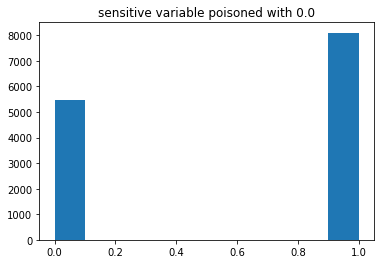

accuary :  90.03243880861102
dispImp :  0.9384783772553551
dispMisclf :  2.2550453161227675
dispFPR :  0.046206229247305546
dispFNR :  0.9180542436085017
odds :  {-1.0: 0.046206229247305546, 1.0: 0.9180542436085071}
poisoned ratio:  0.005


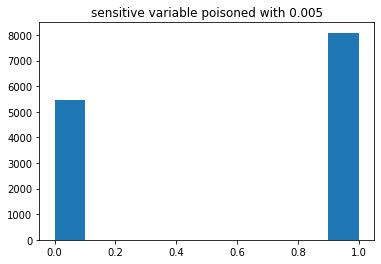

accuary :  90.03243880861102
dispImp :  0.9288786794976722
dispMisclf :  2.259975148125447
dispFPR :  0.07280289873920764
dispFNR :  1.050832563756503
odds :  {-1.0: 0.07280289873920764, 1.0: 1.0508325637565015}
poisoned ratio:  0.01


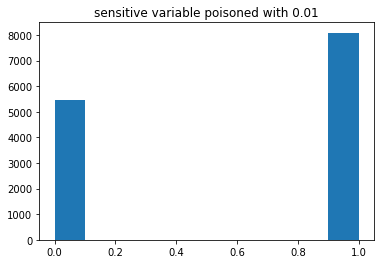

accuary :  90.03243880861102
dispImp :  0.8775081488523844
dispMisclf :  2.2494368360459718
dispFPR :  0.06702939096160061
dispFNR :  1.2917128650335263
odds :  {-1.0: 0.06702939096160061, 1.0: 1.291712865033527}


In [85]:
print(len(xs_te))
rep = 10
ress = []
for rt in [0.0,0.005,0.01]:
    print("="*20)
    print("poisoned ratio: ", rt)
    print("="*20)
    for j in range(rep):
        xs_tep =  poison_Z(xs_te,pos_rt =rt, rs = 4*j+1)
        res = test_FLR_avg_diff(X_te, y_te,xs_tep,load_path = '../results/bank_FLR_model.sm')
        if j==0:
            res_sum = res
        else:
            res_sum = add_res(res, res_sum)
    res_sum = divide_res(res_sum,rep)
    ress.append(res_sum)
    plt.figure()
    plt.title('sensitive variable poisoned with '+str(rt))
    plt.hist(xs_tep.flatten())
    plt.show()
    print_res(res_sum)
#     test_FLR(X_te,y_te,xs_tep,load_path = '../results/german_FLR_model.sm')

In [86]:
print(sum(y_te==1)/len(y_te))

0.11891772338543202


In [87]:
for res in ress:
    print_res(res)

accuary :  90.03243880861102
dispImp :  0.9384783772553551
dispMisclf :  2.2550453161227675
dispFPR :  0.046206229247305546
dispFNR :  0.9180542436085017
odds :  {-1.0: 0.046206229247305546, 1.0: 0.9180542436085071}
accuary :  90.03243880861102
dispImp :  0.9288786794976722
dispMisclf :  2.259975148125447
dispFPR :  0.07280289873920764
dispFNR :  1.050832563756503
odds :  {-1.0: 0.07280289873920764, 1.0: 1.0508325637565015}
accuary :  90.03243880861102
dispImp :  0.8775081488523844
dispMisclf :  2.2494368360459718
dispFPR :  0.06702939096160061
dispFNR :  1.2917128650335263
odds :  {-1.0: 0.06702939096160061, 1.0: 1.291712865033527}


In [ ]:
accuary :  0.7800000000000008
dispImp :  95.85313706114012
dsipMisclf :  81.05185286535512
dispFPR :  84.47226480793788
dispFNR :  69.86858984534416
odds :  {-1: 84.47226480793788, 1: 96.4281597958115}

In [28]:
print_res(res)

accuary :  0.78
dispImp :  96.28606687430216
dsipMisclf :  77.09754748294301
dispFPR :  77.04248366013073
dispFNR :  67.46031746031747
odds :  {-1: 77.04248366013073, 1: 96.40035118525022}


# LR training and test

In [24]:
from sklearn import linear_model as lm

In [25]:
clf2 = lm.LogisticRegression()
clf2.fit(X_tr,y_tr)

LogisticRegression()

In [26]:
def test_LR_avg(clf,X_te, y_te,xs_te):
    pred = clf.predict(X_te)
    pred = pred.flatten()
    y_te = y_te.flatten()
    xs_te = xs_te.flatten()
    res = {}
    res['accuary'] = calculate_overall_accuracy(pred,y_te,True)
    res['dispImp'] = calculate_impact(pred,y_te,xs_te)
    res['dsipMisclf'] = calculate_misclassification(pred,y_te,xs_te)
    res['dispFPR'] = calculate_mistreatment(pred,y_te,xs_te,cond=-1)
    res['dispFNR'] = calculate_mistreatment(pred,y_te,xs_te,cond=1)
    res['odds'] = calculate_odds_clf(pred,y_te,xs_te,return_val = True)
    return res

In [27]:
def test_LR(clf,X_te, y_te,xs_te):
    pred = clf.predict(X_te)
    calculate_overall_accuracy(pred,y_te)
    calculate_prule_clf(pred,y_te,xs_te)
    calculate_odds_clf(pred,y_te,xs_te)

1584
poisoned ratio:  0.0


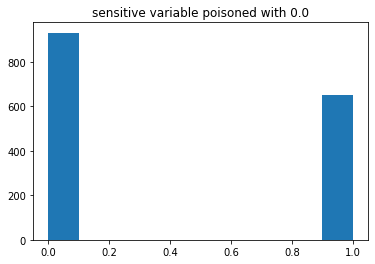

accuary :  0.6824494949494949
dispImp :  41.187680789518474
dsipMisclf :  85.81607670623579
dispFPR :  29.718826405867965
dispFNR :  52.99485226711796
odds :  {-1: 29.718826405867965, 1: 59.22559334475166}
poisoned ratio:  0.01


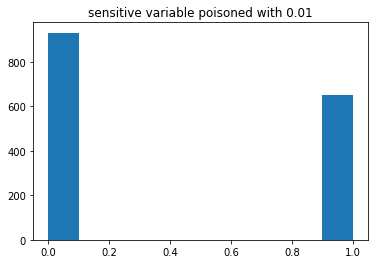

accuary :  0.6824494949494949
dispImp :  41.52139330143906
dsipMisclf :  86.24614496831992
dispFPR :  30.239135272057364
dispFNR :  53.083913853560276
odds :  {-1: 30.239135272057364, 1: 59.359734383246256}
poisoned ratio:  0.05


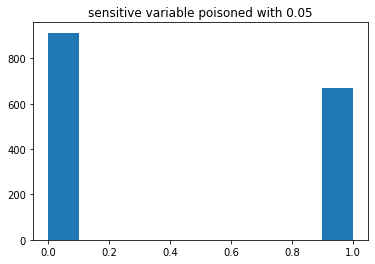

accuary :  0.6824494949494949
dispImp :  43.610423214161486
dsipMisclf :  85.84066253246488
dispFPR :  31.845542519072342
dispFNR :  55.0168320984035
odds :  {-1: 31.845542519072342, 1: 61.799995536966605}
poisoned ratio:  0.1


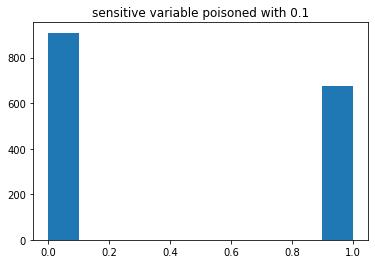

accuary :  0.6824494949494949
dispImp :  46.18237079018337
dsipMisclf :  86.24415058705138
dispFPR :  34.22878925637983
dispFNR :  57.07592556659057
odds :  {-1: 34.22878925637983, 1: 64.2692322892489}
poisoned ratio:  0.2


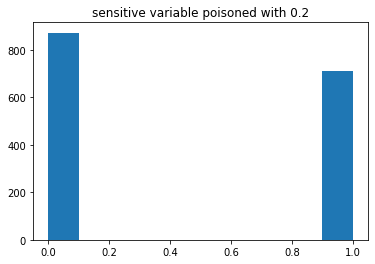

accuary :  0.6824494949494949
dispImp :  51.413929591822104
dsipMisclf :  87.55137295791775
dispFPR :  39.79594712003604
dispFNR :  61.122467434137874
odds :  {-1: 39.79594712003604, 1: 68.79564209756917}
poisoned ratio:  0.3


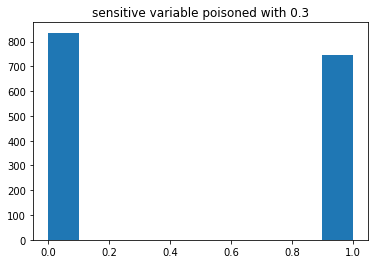

accuary :  0.6824494949494949
dispImp :  56.825155197727966
dsipMisclf :  90.96872758470627
dispFPR :  47.407473418101475
dispFNR :  64.18754280208952
odds :  {-1: 47.407473418101475, 1: 72.19245417013788}


In [28]:
print(len(xs_te))
rep = 10
for rt in [0.0,0.01,0.05,0.1,0.2,0.3]:
    print("="*20)
    print("poisoned ratio: ", rt)
    print("="*20)
    for j in range(rep):
        xs_tep =  poison_Z(xs_te,pos_rt =rt, rs = 3*j)
        res = test_LR_avg(clf2,X_te, y_te,xs_tep)
        if j==0:
            res_sum = res
        else:
            res_sum = add_res(res, res_sum)
    res_sum = divide_res(res_sum,rep)
    plt.figure()
    plt.title('sensitive variable poisoned with '+str(rt))
    plt.hist(xs_tep.flatten())
    plt.show()
    print_res(res_sum)
#     test_FLR(X_te,y_te,xs_tep,load_path = '../results/german_FLR_model.sm')

300
poisoned ratio:  0.0


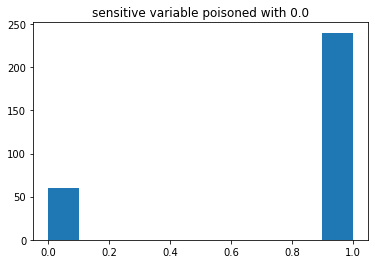

Overall accuracy: 0.7933333333333333
disparate impact:  100.0
disparate misclassification rate:  61.11111111111111
disparate false positive rate: 70.90909090909092
disparate false negative rate: 90.3114186851211
equalized opportunity for -1 : 70.90909090909092
equalized opportunity for 1 : 98.9618094178717
poisoned ratio:  0.01


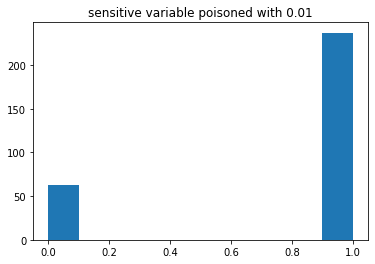

Overall accuracy: 0.7933333333333333
disparate impact:  99.21507064364208
disparate misclassification rate:  64.9789029535865
disparate false positive rate: 74.76923076923076
disparate false negative rate: 84.31372549019608
equalized opportunity for -1 : 74.76923076923076
equalized opportunity for 1 : 98.30866807610995
poisoned ratio:  0.05


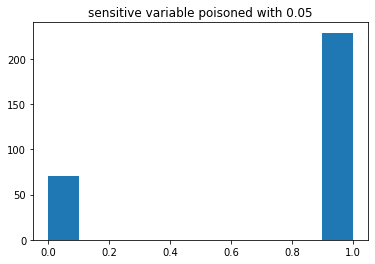

Overall accuracy: 0.7933333333333333
disparate impact:  98.9596670934699
disparate misclassification rate:  60.53233520482429
disparate false positive rate: 71.15749525616698
disparate false negative rate: 98.20359281437126
equalized opportunity for -1 : 71.15749525616698
equalized opportunity for 1 : 99.80617024713293
poisoned ratio:  0.1


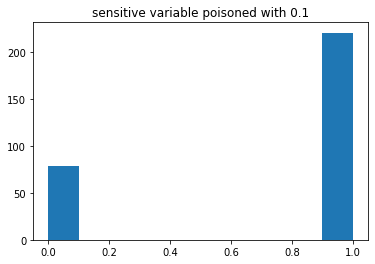

Overall accuracy: 0.7933333333333333
disparate impact:  92.17092266042292
disparate misclassification rate:  60.61381074168798
disparate false positive rate: 82.25324027916251
disparate false negative rate: 66.2551440329218
equalized opportunity for -1 : 82.25324027916251
equalized opportunity for 1 : 95.18213866039953
poisoned ratio:  0.2


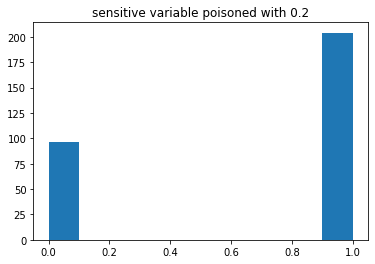

Overall accuracy: 0.7933333333333333
disparate impact:  96.83544303797468
disparate misclassification rate:  65.15837104072399
disparate false positive rate: 77.81954887218045
disparate false negative rate: 75.2895752895753
equalized opportunity for -1 : 77.81954887218045
equalized opportunity for 1 : 96.8395061728395
poisoned ratio:  0.3


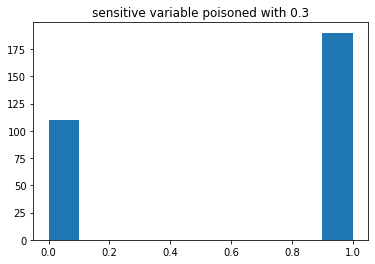

Overall accuracy: 0.7933333333333333
disparate impact:  99.37733499377336
disparate misclassification rate:  70.30075187969925
disparate false positive rate: 76.92307692307692
disparate false negative rate: 94.20289855072464
equalized opportunity for -1 : 76.92307692307692
equalized opportunity for 1 : 99.36


In [24]:
print(len(xs_te))
for rt in [0.0,0.01,0.05,0.1,0.2,0.3]:
    print("="*20)
    print("poisoned ratio: ", rt)
    print("="*20)
    xs_tep =  poison_Z(xs_te,pos_rt =rt, rs = 3)
    plt.figure()
    plt.title('sensitive variable poisoned with '+str(rt))
    plt.hist(xs_tep.flatten())
    plt.show()

    test_LR(clf2,X_te,y_te,xs_tep)

In [25]:
bank = pd.read_csv('../data/bank-full.csv')

In [26]:
print(bank)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd